# Kode til DOA eksamen 
## Vejle kommune sygefravær

### Imports til programmet

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### Indhentning og redigering af data

In [6]:
#pd.read_csv indlæser datasættet til python
data = pd.read_csv('data_sygefravær.csv', sep = ';')

#Funktionen fjerner alle rækker, som har værdier under 2019 og over 2020 i Aar-kolonnen.
data.drop(data[data['Aar'] <= 2018 ].index, inplace = True)
data.drop(data[data['Aar'] == 2021 ].index, inplace = True)
#Funktionen fjerner de kolonner, som er indholder dobbelt data og data, som ikke er påkrævet for projektet.
data.drop(['aarmm','sygdom_kal','ansatte_kal','mulige_kaldage','fravproc_kal'], axis = 1, inplace = True)

#De nedenstående linjer ændrer string til float, så der kan laves udregninger på datasættet.
data["fproc_dv"]=data["fproc_dv"].str.replace(",",".").astype(np.float64)
data["sygdom_dv"]=data["sygdom_dv"].str.replace(",",".").astype(np.float64)
data["ansatte_dv"]=data["ansatte_dv"].str.replace(",",".").astype(np.float64)
data["mulige_dvdage"]=data["mulige_dvdage"].str.replace(",",".").astype(np.float64)



data.reset_index(inplace=True,drop=True)

data

#dv = Dagsværk, 7,4 timer dagligt
#Sygdom_dv = Fulde sygedage
#ansatte_dv = Antal ansatte fuldtid
#mulige_dvdage = Mulige arbejdesdage for de fuldsansatte
#fproc_dv = Fraværsprocent = sygdom_dv/mulige_dvdage

,Aar,Maaned,afd1txt,FagmedTxt,sygdom_dv,ansatte_dv,mulige_dvdage,fproc_dv
0,2019,1,Børne- og Ungeforvaltningen,FagMED Dagtilbud,1890.445946,1371.124446,30164.737840,0.062670
1,2019,1,Børne- og Ungeforvaltningen,"FagMED Familie, forebyggelse og stab",924.959459,682.101965,15006.243240,0.061638
2,2019,1,Børne- og Ungeforvaltningen,FagMED Uddannelse & Læring,2151.959486,1872.267203,41189.878490,0.052244
3,2019,1,Kommunaldirektørens område,Kommunaldirektørens stabe,92.459459,111.057125,2443.256757,0.037842
4,2019,1,Kultur & Sundhed,FagMED Kultur & Borgerservice,268.169730,246.490491,5422.790811,0.049452
...,...,...,...,...,...,...,...,...
352,2020,12,Velfærdsforvaltningen,FagMED Senior,2353.604432,1545.850795,34008.717510,0.069205
353,2020,12,Velfærdsforvaltningen,FagMED Voksen Drift,1606.641892,1057.439459,23263.668110,0.069062
354,2020,12,Velfærdsforvaltningen,Plejecenter Solgaven,58.864865,50.779189,1117.142162,0.052692
355,2020,12,Økonomi- & Arbejdsmarkedsforvaltningen,FagMED Arbejdsmarkedsområdet,246.783784,315.831867,6948.301081,0.035517


### Funktioner til udregning og bearbejdelse af data

In [7]:
#Funktionerne inddeler kolonnerne efter unikke værdier.
afdelinger = data["afd1txt"].unique()
data[data["afd1txt"]==afdelinger[0]]
#0 = Børne- og Ungeforvaltningen 
#1 = Kommunaldirektørens område 
#2 = Kultur & Sundhed
#3 = Teknik & Miljø
#4 = Velfærdsforvaltningen
#5 = Økonomi- & Arbejdsmarkedsforvaltningen

aar = data["Aar"].unique()
Aar19 = data[data["Aar"]==aar[0]]
Aar20 = data[data["Aar"]==aar[1]]
#0 = 2019 
#1 = 2020

fag = data["FagmedTxt"].unique()
data[data["FagmedTxt"]==fag[11]]
#0 = FagMED Dagtilbud
#1 = FagMED Familie, forebyggelse og stab
#2 = FagMED Uddannelse og Læring
#3 = Kommunaldirektørens stabe
#4 = FagMED Kultur & Borgerservice
#5 = FagMED Sundhed
#6 = FagMED Teknik & Miljø
#7 = 
#8 = FagMED Administration Velfærd
#9 = FagMED Senior
#10 = FagMED Voksen Drift
#11 = Plejecenter Solgaven
#12 = FagMED Arbejdsmarkedsområdet
#13 = FagMED Økonomi & Administration



,Aar,Maaned,afd1txt,FagmedTxt,sygdom_dv,ansatte_dv,mulige_dvdage,fproc_dv
12,2019,1,Velfærdsforvaltningen,Plejecenter Solgaven,77.000000,55.321867,1217.081081,0.063266
28,2019,2,Velfærdsforvaltningen,Plejecenter Solgaven,72.797297,57.837838,1156.756757,0.062932
43,2019,3,Velfærdsforvaltningen,Plejecenter Solgaven,137.148649,59.270270,1244.675676,0.110188
58,2019,4,Velfærdsforvaltningen,Plejecenter Solgaven,91.662162,59.054054,1122.027027,0.081693
74,2019,5,Velfærdsforvaltningen,Plejecenter Solgaven,141.054054,60.135135,1262.837838,0.111696
90,2019,6,Velfærdsforvaltningen,Plejecenter Solgaven,105.202703,59.189189,1124.594595,0.093547
106,2019,7,Velfærdsforvaltningen,Plejecenter Solgaven,75.472973,58.492362,1345.324324,0.056100
120,2019,8,Velfærdsforvaltningen,Plejecenter Solgaven,76.162162,59.544226,1309.972973,0.058140
134,2019,9,Velfærdsforvaltningen,Plejecenter Solgaven,73.054054,58.344273,1225.229730,0.059624
149,2019,10,Velfærdsforvaltningen,Plejecenter Solgaven,74.500000,58.148649,1337.418919,0.055704


<ipython-input-4-8b9af0c3fa58>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_m["FagMEDmean19"]=[Aar19[data["FagmedTxt"]==f]["fproc_dv"].mean()for f in fag]
<ipython-input-4-8b9af0c3fa58>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_m["FagMEDmean20"]=[Aar20[data["FagmedTxt"]==f]["fproc_dv"].mean()for f in fag]


,Fproc_FagMED,FagMEDmean,FagMEDmean19,FagMEDmean20
0,FagMED Dagtilbud,0.049992,0.051578,0.048407
1,"FagMED Familie, forebyggelse og stab",0.051302,0.048541,0.054062
2,FagMED Uddannelse & Læring,0.041575,0.044430,0.038720
3,Kommunaldirektørens stabe,0.022332,0.026904,0.017759
4,FagMED Kultur & Borgerservice,0.022506,0.024069,0.020422
5,FagMED Sundhed,0.036854,0.039840,0.033868
6,FagMED Teknik & Miljø,0.032657,0.034253,0.031061
8,FagMED Administration Velfærd,0.023156,0.023559,0.022753
9,FagMED Senior,0.053419,0.052095,0.054743
10,FagMED Voksen Drift,0.056970,0.056042,0.057897


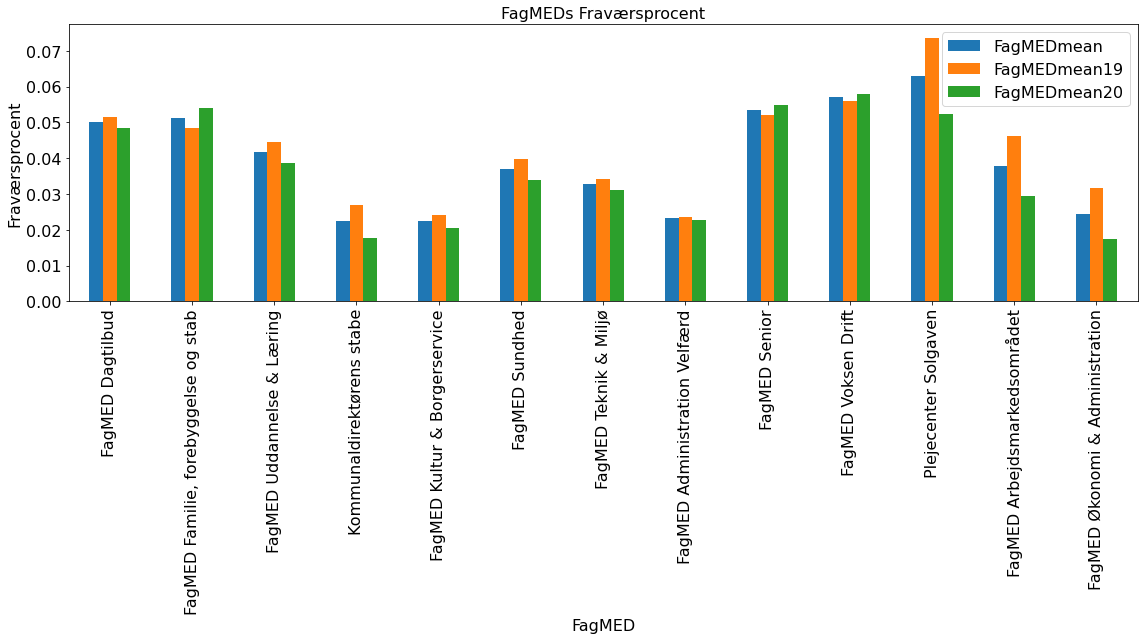

In [4]:
#Opretter et dataframe
df_m=pd.DataFrame()
df_m["Fproc_FagMED"]=fag

#Vi udregner gennemsnitet af fraværsprocenten for 2019 og 2020 og desuden kun for 2019 og kun for 2020
df_m["FagMEDmean"]=[data[data["FagmedTxt"]==f]["fproc_dv"].mean()for f in fag]
df_m["FagMEDmean19"]=[Aar19[data["FagmedTxt"]==f]["fproc_dv"].mean()for f in fag]
df_m["FagMEDmean20"]=[Aar20[data["FagmedTxt"]==f]["fproc_dv"].mean()for f in fag]

#Fjerner række 7, som ikke har nogen tilknyttede værdier. 
df_m.drop(index=7,inplace=True)

#Oprettelse og design af plottet
df_m.plot(kind="bar",figsize=(16,9),fontsize=16)
plt.title('FagMEDs Fraværsprocent',fontsize=16)
plt.xlabel('FagMED',fontsize=16)
plt.ylabel('Fraværsprocent', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(ticks=[i for i in range(13)],labels=df_m["Fproc_FagMED"])
plt.tight_layout()
plt.savefig("./plot1.pdf")
df_m

<ipython-input-9-24e3259f5a4f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(x,Aar19[data["FagmedTxt"]==fag[11]]["fproc_dv"].values, label="Solgaven 2019")
<ipython-input-9-24e3259f5a4f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(x,Aar20[data["FagmedTxt"]==fag[11]]["fproc_dv"].values, label="Solgaven 2020")
<ipython-input-9-24e3259f5a4f>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(x,Aar19[data["FagmedTxt"]==fag[13]]["fproc_dv"].values, label="FagMED Ø&A 2019")
<ipython-input-9-24e3259f5a4f>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(x,Aar20[data["FagmedTxt"]==fag[13]]["fproc_dv"].values, label="FagMED Ø&A 2020")


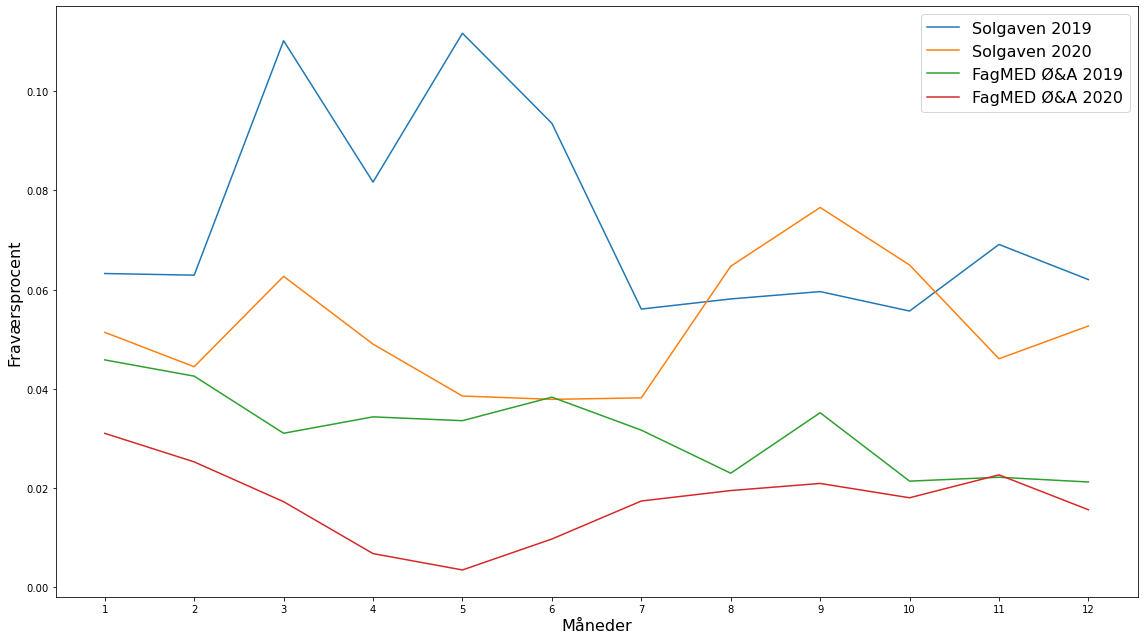

In [9]:
#Oprettelse af plot
plt.figure(figsize=(16,9))
x=[i for i in range(1,13)]

#Funktioner, som tager udgangspunkt i de to afdelinger, som vi vil se på.
#Funktionerne bruges til at lave et kurve diagram.
plt.plot(x,Aar19[data["FagmedTxt"]==fag[11]]["fproc_dv"].values, label="Solgaven 2019")
plt.plot(x,Aar20[data["FagmedTxt"]==fag[11]]["fproc_dv"].values, label="Solgaven 2020")
plt.plot(x,Aar19[data["FagmedTxt"]==fag[13]]["fproc_dv"].values, label="FagMED Ø&A 2019")
plt.plot(x,Aar20[data["FagmedTxt"]==fag[13]]["fproc_dv"].values, label="FagMED Ø&A 2020")

#Customization af diagrammet
plt.xticks(ticks=x)
plt.xlabel("Måneder", fontsize=16)
plt.ylabel("Fraværsprocent", fontsize=16)
plt.legend(loc="best", fontsize=16)
plt.tight_layout()
plt.savefig("./plot2.pdf")
plt.show()


<ipython-input-10-4a3585d587c8>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n["afdmean19"]=[Aar19[data["afd1txt"]==afdeling]["fproc_dv"].mean()for afdeling in afdelinger]
<ipython-input-10-4a3585d587c8>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n["afdmean20"]=[Aar20[data["afd1txt"]==afdeling]["fproc_dv"].mean()for afdeling in afdelinger]


,afdelinger,afdmean,afdmean19,afdmean20
0,Børne- og Ungeforvaltningen,0.047623,0.048183,0.047063
1,Kommunaldirektørens område,0.022332,0.026904,0.017759
2,Kultur & Sundhed,0.030291,0.033437,0.027145
3,Teknik & Miljø,0.032657,0.034253,0.031061
5,Velfærdsforvaltningen,0.059195,0.066777,0.051613
6,Økonomi- & Arbejdsmarkedsforvaltningen,0.031181,0.038963,0.023400


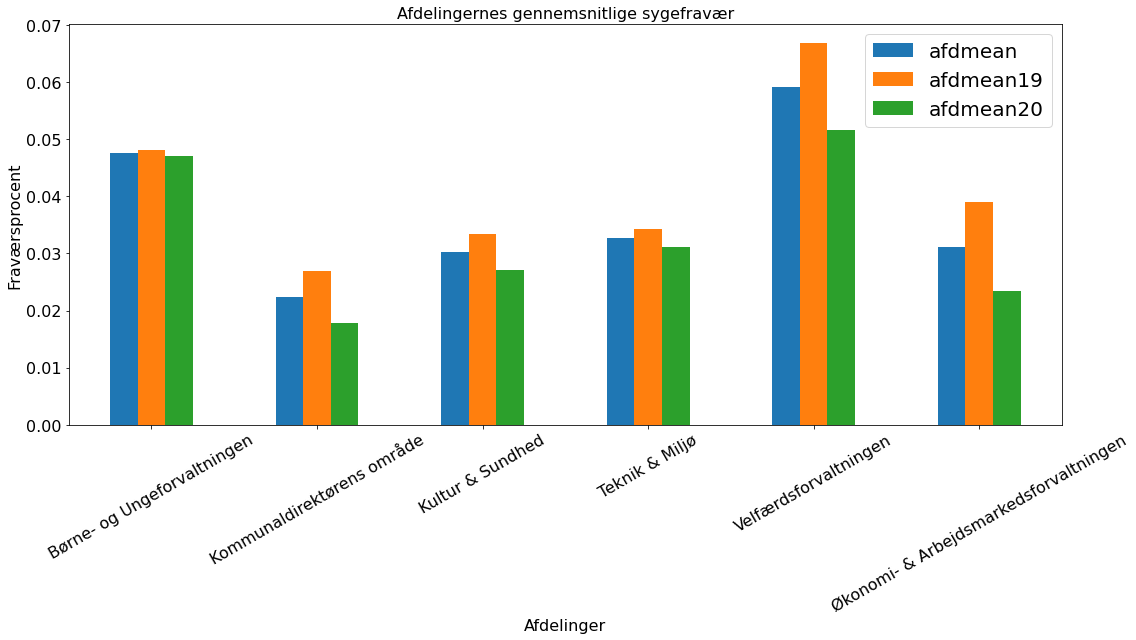

In [10]:
#Oprettelse af et Dataframe.
df_n=pd.DataFrame()
df_n["afdelinger"]=afdelinger

#Funktionerne udregner gennemsnittet for hver af forvaltningerne, 2019 og 2020, kun 2019 og kun 2020
df_n["afdmean"]=[data[data["afd1txt"]==afdeling]["fproc_dv"].mean()for afdeling in afdelinger]
df_n["afdmean19"]=[Aar19[data["afd1txt"]==afdeling]["fproc_dv"].mean()for afdeling in afdelinger]
df_n["afdmean20"]=[Aar20[data["afd1txt"]==afdeling]["fproc_dv"].mean()for afdeling in afdelinger]

df_n.drop(index=4,inplace=True)

#Oprettelse af plot
df_n.plot(kind="bar",figsize=(16,9),fontsize=16)
plt.xticks(ticks=[i for i in range(6)],labels=df_n["afdelinger"], rotation=30)
plt.xlabel("Afdelinger",fontsize=16)
plt.ylabel('Fraværsprocent',fontsize=16)
plt.title('Afdelingernes gennemsnitlige sygefravær', fontsize=16)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("./plot3.pdf")
df_n

### 